## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [11]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
vote    1000 non-null object
dtypes: object(1)
memory usage: 7.9+ KB


In [13]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [17]:
def sample(brown, n=1000):
    return pd.DataFrame({'Vote': np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [21]:
s = sample(0.51,n=1000)
s.Vote.value_counts(normalize=True)

Brown    0.534
Green    0.466
Name: Vote, dtype: float64

In [22]:
dist = pd.DataFrame([sample(0.51).Vote.value_counts(normalize=True) for i in range(1000)])

In [23]:
dist.head()

,Brown,Green
Vote,0.505,0.495
Vote,0.511,0.489
Vote,0.501,0.499
Vote,0.503,0.497
Vote,0.492,0.508


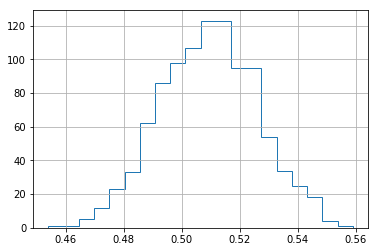

In [27]:
dist.Brown.hist(histtype='step', bins=20)

In [29]:
def samplingdist(brown, n=1000):
    return pd.DataFrame([sample(0.51).Vote.value_counts(normalize=True) for i in range(1000)])

In [30]:
def quantile(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [31]:
quantile(0.5)

(0.479, 0.5420250000000001)